# Dike Model Analysis

In [1]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Scenario discovery with PRIM

In [3]:
# import data
experiments, outcomes = load_results('./results/dikeanalysis_problem2.tar.gz')

In [4]:
# show experiments
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,117,137.695820,10.0,0.192255,181.288824,1.0,0.885969,224.705726,1.5,0.671473,...,0,0,0,0,0,0,0,0,Policy 0,dikesnet
1,7,296.945200,1.0,0.796338,126.095034,1.5,0.994529,101.994811,10.0,0.280376,...,0,0,0,0,0,0,0,1,Policy 0,dikesnet
2,54,214.418537,1.0,0.717056,347.720702,1.5,0.242277,287.327219,1.0,0.224819,...,0,0,0,0,0,0,0,2,Policy 0,dikesnet
3,55,298.602184,1.0,0.574311,312.904714,1.5,0.382604,205.254117,1.0,0.937788,...,0,0,0,0,0,0,0,3,Policy 0,dikesnet
4,14,232.990579,10.0,0.256071,55.118163,1.0,0.492966,288.942315,10.0,0.542156,...,0,0,0,0,0,0,0,4,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,28,181.372720,1.5,0.586355,231.299909,1.5,0.268159,30.707375,1.5,0.080432,...,0,0,0,0,0,0,0,4995,Policy 0,dikesnet
4996,71,226.490831,10.0,0.446196,278.630251,1.5,0.763019,298.223605,10.0,0.411942,...,0,0,0,0,0,0,0,4996,Policy 0,dikesnet
4997,94,66.874774,1.0,0.183060,190.224466,1.0,0.670637,56.179129,1.5,0.379469,...,0,0,0,0,0,0,0,4997,Policy 0,dikesnet
4998,77,32.808281,1.5,0.408734,277.798925,1.5,0.336240,335.145336,1.0,0.439110,...,0,0,0,0,0,0,0,4998,Policy 0,dikesnet


In [5]:
# clean up experiments
X = experiments.iloc[:, 0:(len(experiments.columns)-3)]

In [6]:
# show all outcome variables
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths'])

In [21]:
def dep_var(df, outcome_to_study='Expected Annual Damage', percentile=85): 
    """
    Returns the dependent variable for the scenario discovery analysis, 
    which takes either 0 or 1 depending on a threshold. This threshold is
    computed based on the percentile of data points. 
    """
    
    # Calculate the threshold
    threshold = np.percentile(outcomes[outcome_to_study], percentile) 
    # Show threshold
    print(f"The threshold for {percentile}% worst outcomes for {outcome_to_study} equals {threshold}.")
    # Get column to optimise
    opt = outcomes[outcome_to_study]
    # To dataframe
    opt = pd.DataFrame(opt)
    # Compute dependent variable
    opt[outcome_to_study] = np.where(opt[0] > threshold, 1, 0)
    # Assign variable to y as numpy array
    y = opt[outcome_to_study].to_numpy()
    # return y
    return y

In [22]:
y = dep_var(df=outcomes, outcome_to_study='Expected Annual Damage')

The threshold for 85% worst outcomes for Expected Annual Damage equals 2334416136.094247.


In [23]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [24]:
# Find box
box = sd_alg.find_box()

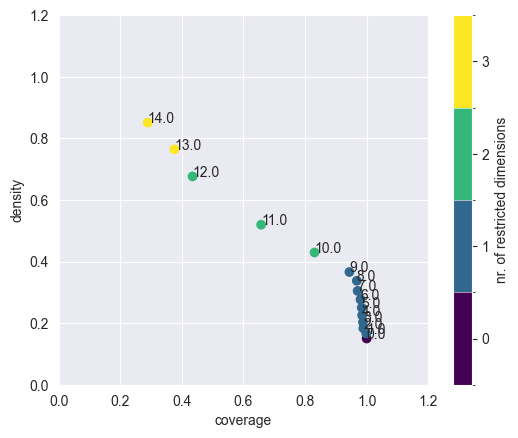

In [25]:
# Show trade-off between density and coverage
box.show_tradeoff(annotated=True)
plt.show()

In [33]:
# Determine point to study, depends on: 
# (1) maximise density
# (2) maximise coverage
# (3) minimise number of restricted dimensions
point_to_study = 11

In [34]:
box.inspect(point_to_study)

coverage       1.000000
density        0.478927
id            11.000000
k            750.000000
mass           0.313200
mean           0.478927
n           1566.000000
res_dim        1.000000
Name: 11, dtype: float64

            box 11                                  
               min       max qp value       qp value
A.3_pfail  0.00009  0.313233      NaN  4.789750e-207



[None]

[<Figure size 640x480 with 1 Axes>]

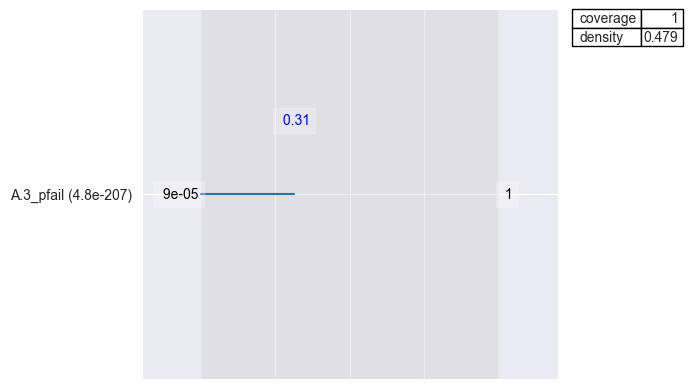

In [35]:
box.inspect(point_to_study, style='graph')

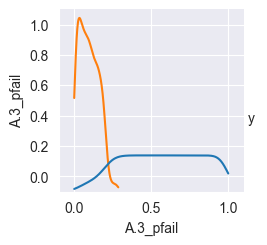

In [36]:
box.show_pairs_scatter(point_to_study)
plt.show()

In [37]:
# Define outcome to study
y = dep_var(df=outcomes, outcome_to_study='Expected Number of Deaths')

The threshold for 85% worst outcomes for Expected Number of Deaths equals 2.581666075302055.


In [38]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [39]:
# Find box
box = sd_alg.find_box()

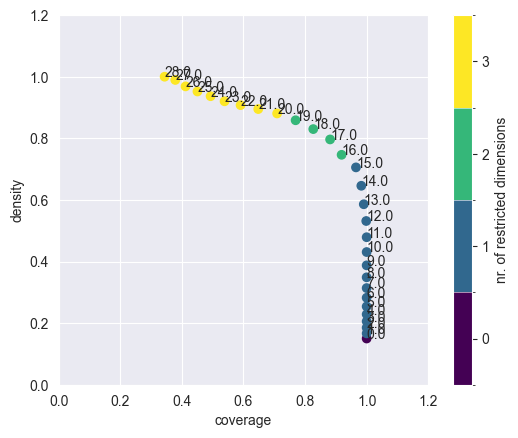

In [40]:
# Show trade-off between coverage and density
box.show_tradeoff(annotated=True)
plt.show()

In [41]:
# Determine point to study
point_to_study = 18

In [42]:
box.inspect(point_to_study)

coverage      0.826667
density       0.829987
id           18.000000
k           620.000000
mass          0.149400
mean          0.829987
n           747.000000
res_dim       2.000000
Name: 18, dtype: float64

             box 18                                 
                min       max      qp value qp value
A.3_pfail  0.000090  0.184842           NaN      0.0
A.1_pfail  0.195909  0.999961  1.053799e-09      NaN



[None]

[<Figure size 640x480 with 1 Axes>]

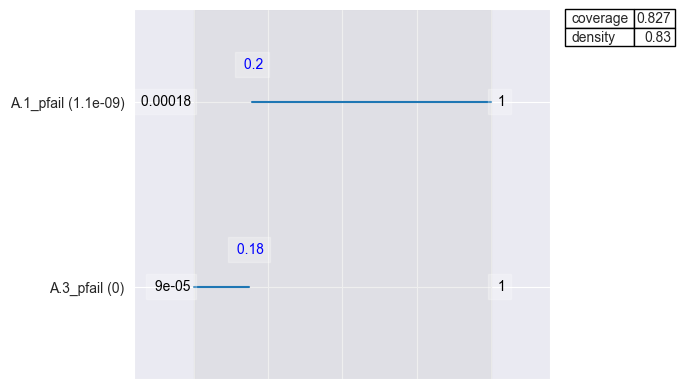

In [43]:
box.inspect(point_to_study, style='graph')